---
### Proyecto Retail 
### Fase 2. Exploración de los datos
### Por: Equipo 5 (Luis Hermenegildo)
---

---
#### Carga de librerias
---

In [1]:
#Importamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import hasNullData

---
#### Lectura de archivo y carga exploración de datos
---

In [2]:
# Cargar los datos
df = pd.read_csv('../../data/OnlineRetail_clean.csv', encoding='ISO-8859-1')
# Mostrar las primeras filas
df.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,Year,Month,Day,Hour,DayOfWeek
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2


---
#### Establecimiento de tipos de datos
---

In [3]:
# Convertir InvoiceDate a datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401604 entries, 0 to 401603
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalSpent   401604 non-null  float64       
 9   Year         401604 non-null  int64         
 10  Month        401604 non-null  int64         
 11  Day          401604 non-null  int64         
 12  Hour         401604 non-null  int64         
 13  DayOfWeek    401604 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6), object(4)
memory usage: 42.9+ MB


---
#### Exploración de datos
---

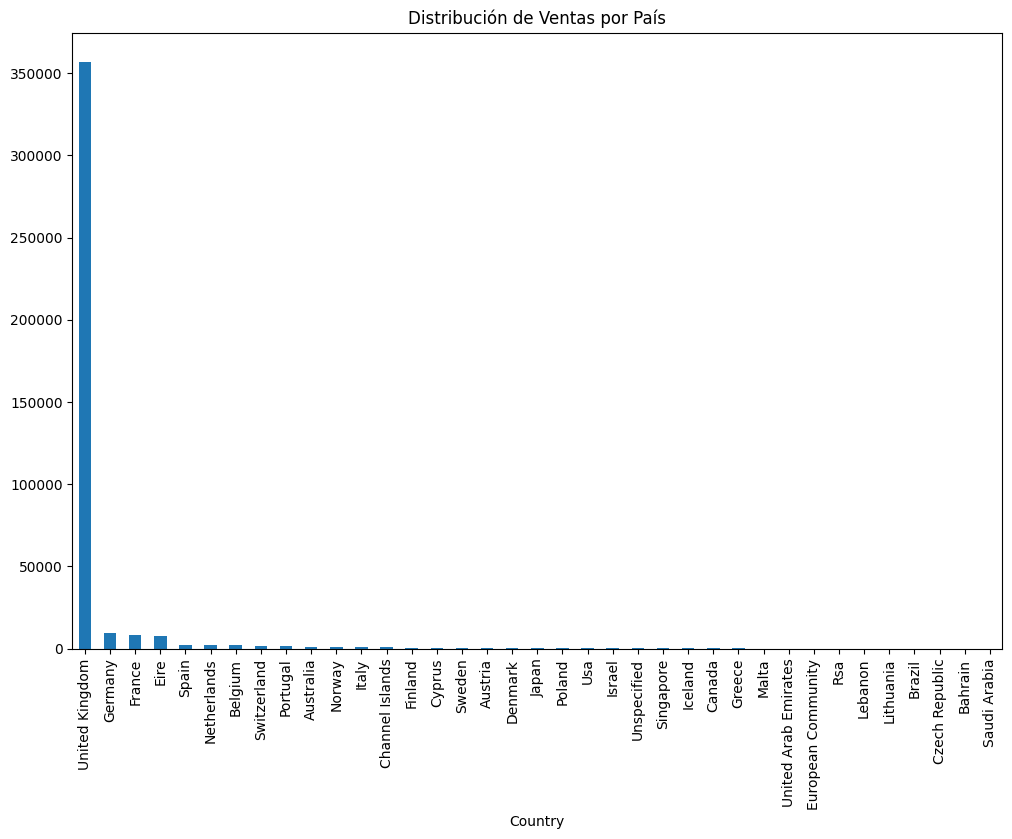

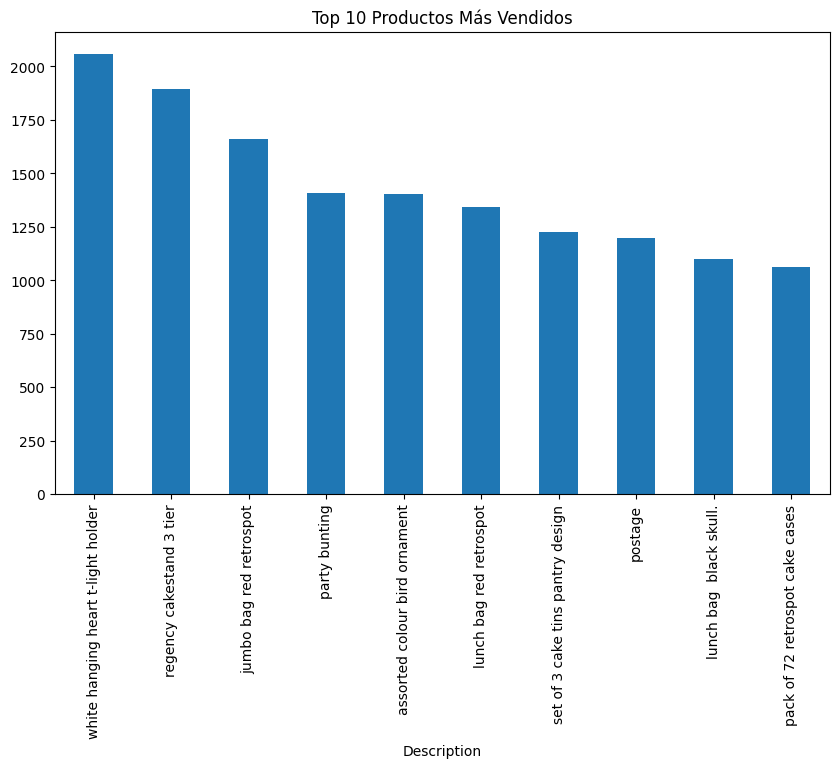

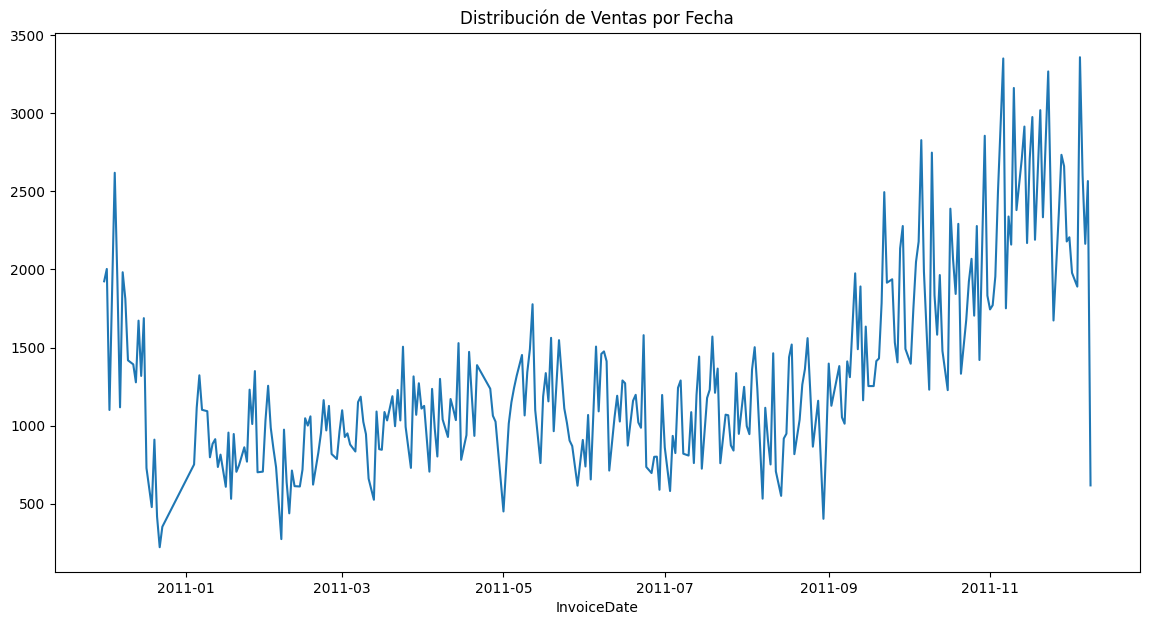

In [5]:
# Distribución de ventas por país
plt.figure(figsize=(12, 8))
df['Country'].value_counts().plot(kind='bar')
plt.title('Distribución de Ventas por País')
plt.show()

# Productos más vendidos
top_products = df['Description'].value_counts().head(10)
top_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Productos Más Vendidos')
plt.show()

# Distribución de ventas por fecha
df['InvoiceDate'].dt.date.value_counts().sort_index().plot(figsize=(14, 7))
plt.title('Distribución de Ventas por Fecha')
plt.show()


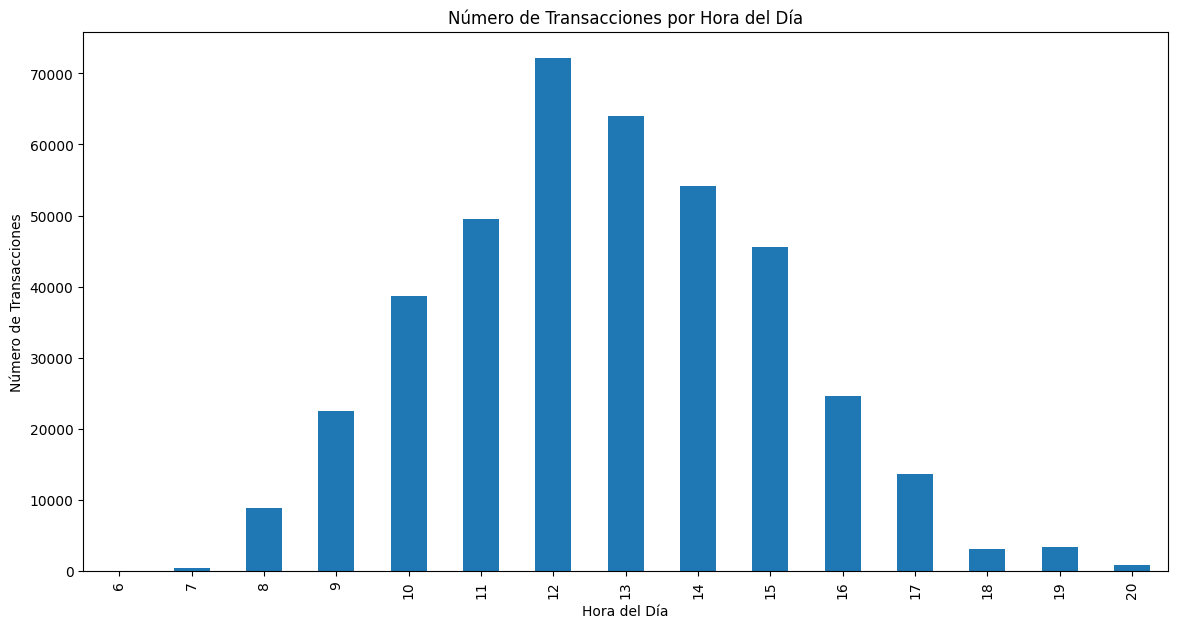

In [6]:
# Transacciones por hora del día
df['Hour'] = df['InvoiceDate'].dt.hour
df['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(14, 7))
plt.title('Número de Transacciones por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Transacciones')
plt.show()


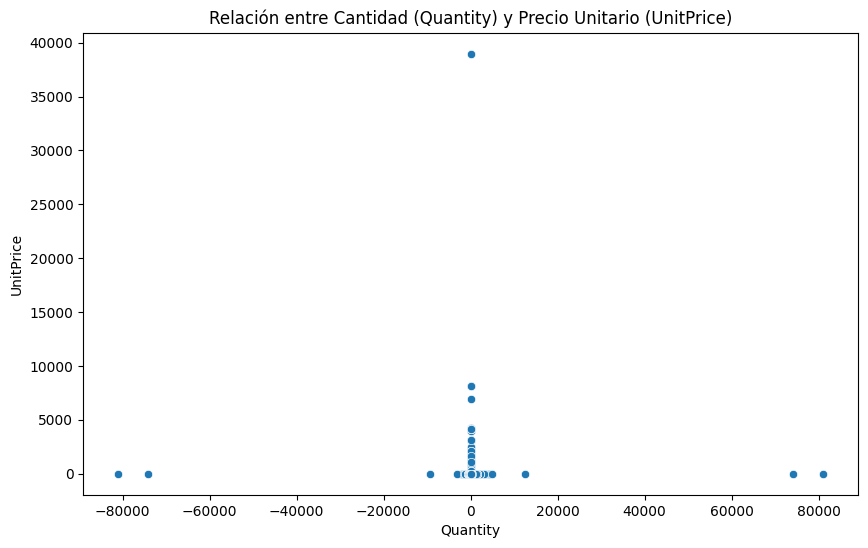

In [7]:
# Relación entre Quantity y UnitPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df)
plt.title('Relación entre Cantidad (Quantity) y Precio Unitario (UnitPrice)')
plt.show()


Index(['Quantity', 'UnitPrice', 'CustomerID', 'TotalSpent', 'Year', 'Month',
       'Day', 'Hour', 'DayOfWeek'],
      dtype='object')


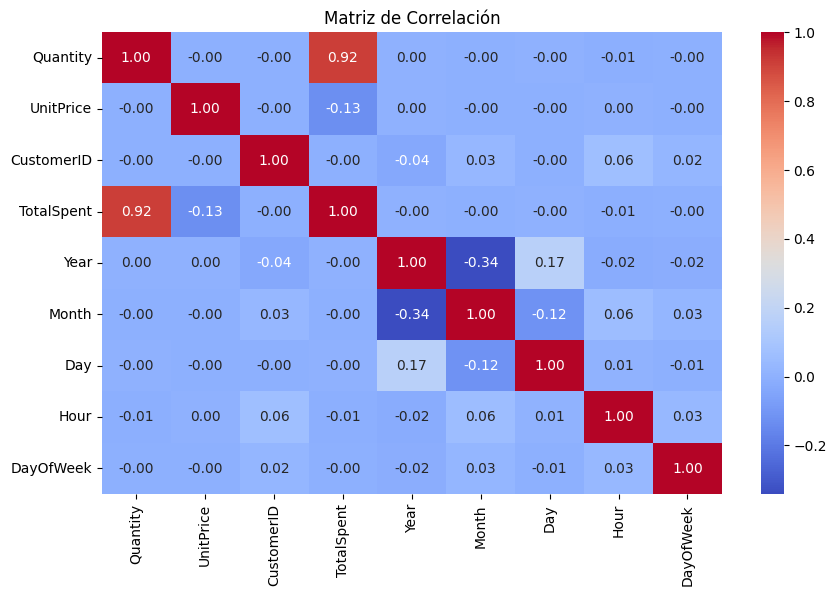

In [8]:
# Matriz de correlación
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=[float, int])

# Comprobar las columnas seleccionadas
print(df_numeric.columns)


corr_matrix = df_numeric.corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


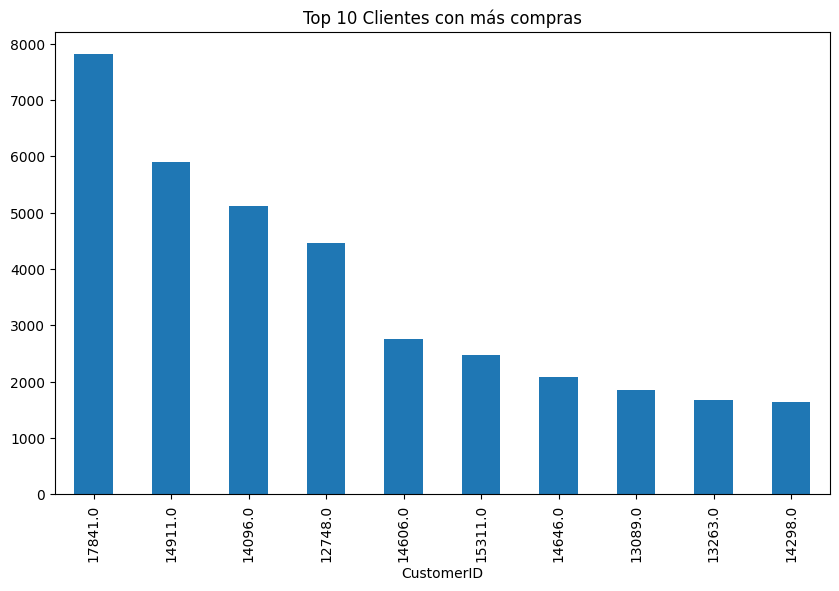

In [9]:
# Los clientes con mayor ventas
top_products = df['CustomerID'].value_counts().head(10)
top_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Clientes con más compras')
plt.show()

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187322.17
14911.0    132458.73
12415.0    123725.45
14156.0    113214.59
17511.0     88125.38
16684.0     65892.08
13694.0     62690.54
15311.0     59284.19
Name: TotalSpent, dtype: float64


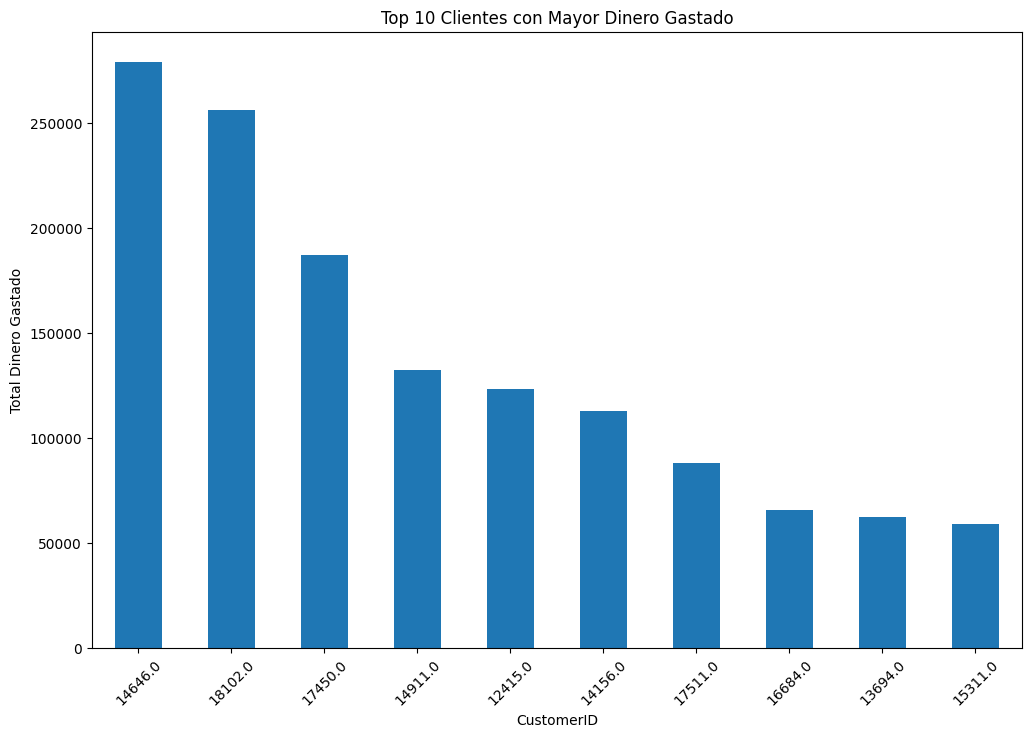

In [10]:

# Agrupar por CustomerID y sumar el total gastado
top_customers = df.groupby('CustomerID')['TotalSpent'].sum().sort_values(ascending=False).head(10)

# Mostrar los top 10 clientes
print(top_customers)

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
top_customers.plot(kind='bar')
plt.title('Top 10 Clientes con Mayor Dinero Gastado')
plt.xlabel('CustomerID')
plt.ylabel('Total Dinero Gastado')
plt.xticks(rotation=45)
plt.show()


Country
United Kingdom    6747156.154
Netherlands        284661.540
Eire               250001.780
Germany            221509.470
France             196626.050
Australia          137009.770
Switzerland         55739.400
Spain               54756.030
Belgium             40910.960
Sweden              36585.410
Name: TotalSpent, dtype: float64


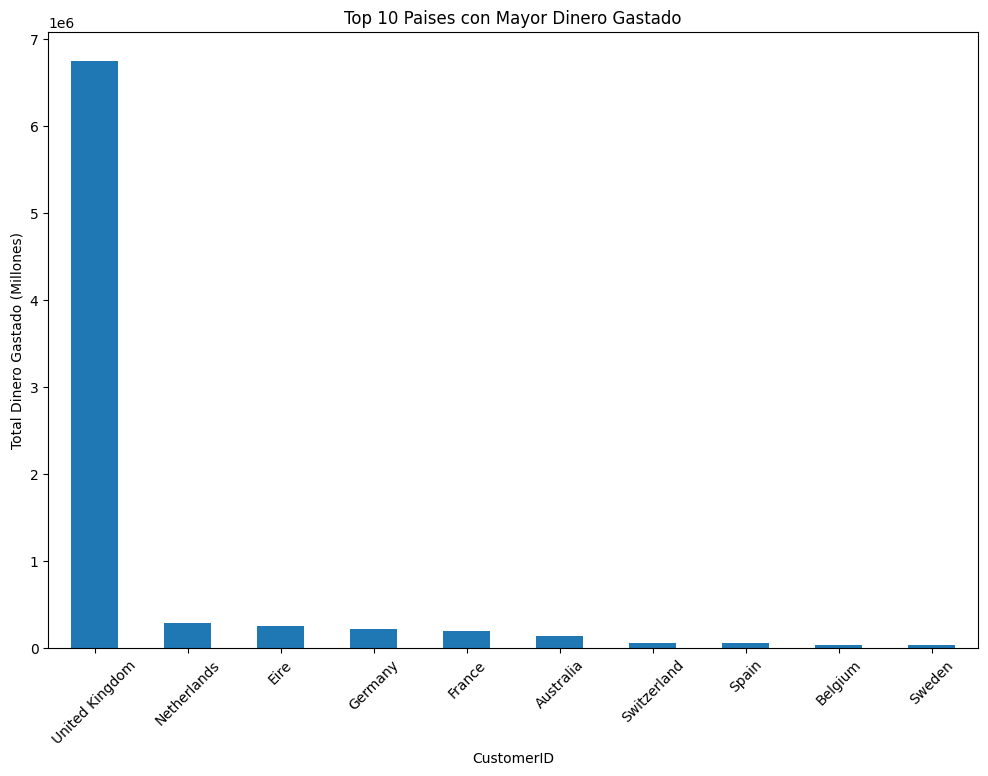

In [11]:

# Agrupar por CustomerID y sumar el total gastado
top_countries = df.groupby('Country')['TotalSpent'].sum().sort_values(ascending=False).head(10)

# Mostrar los top 10 clientes
print(top_countries)

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar')
plt.title('Top 10 Paises con Mayor Dinero Gastado')
plt.xlabel('CustomerID')
plt.ylabel('Total Dinero Gastado (Millones)')
plt.xticks(rotation=45)
plt.show()


In [12]:
# Agrupar por CustomerID y sumar el total gastado, seleccionando los 10 mayores

top_customers = df.groupby('CustomerID')['TotalSpent'].sum().sort_values(ascending=False).head(10).index


# Filtrar el DataFrame para que solo contenga los datos de los top 10 clientes
df_top_customers = df[df['CustomerID'].isin(top_customers)]

# Convertir InvoiceDate a formato datetime
df_top_customers['InvoiceDate'] = pd.to_datetime(df_top_customers['InvoiceDate'])

# Agrupar por CustomerID y por día, sumando el dinero gastado
df_grouped = df_top_customers.groupby(['CustomerID', df_top_customers['InvoiceDate'].dt.date])['TotalSpent'].sum().unstack(fill_value=0)



C:\Users\luish\AppData\Local\Temp\ipykernel_2328\3577486653.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_customers['InvoiceDate'] = pd.to_datetime(df_top_customers['InvoiceDate'])


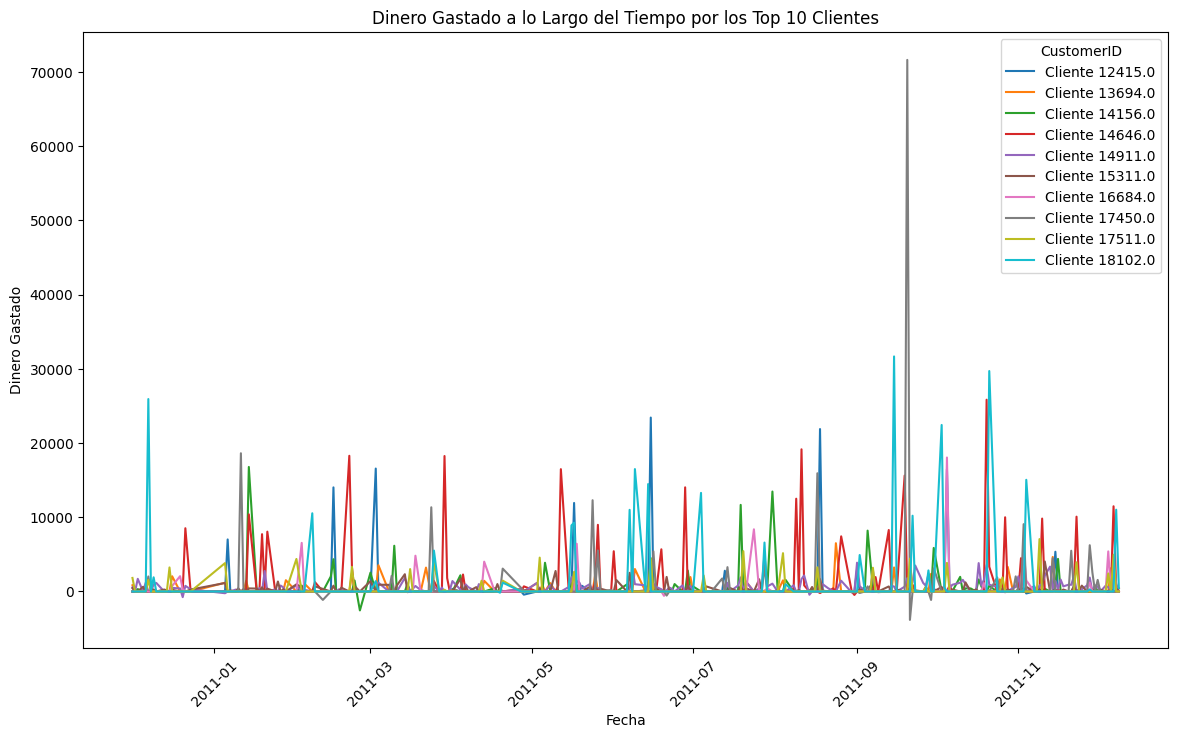

In [13]:
import matplotlib.pyplot as plt

# Graficar el dinero gastado a lo largo del tiempo para los top 10 clientes
plt.figure(figsize=(14, 8))
for customer in df_grouped.index:
    plt.plot(df_grouped.columns, df_grouped.loc[customer], label=f'Cliente {customer}')

plt.title('Dinero Gastado a lo Largo del Tiempo por los Top 10 Clientes')
plt.xlabel('Fecha')
plt.ylabel('Dinero Gastado')
plt.legend(title='CustomerID')
plt.xticks(rotation=45)
plt.show()


Description
paper craft , little birdie            80995
medium ceramic top storage jar         74494
rotating silver angels t-light hldr     9367
manual                                  3995
fairy cake flannel assorted colour      3150
white hanging heart t-light holder      2578
gin + tonic diet metal sign             2030
herb marker basil                       1527
feltcraft doll molly                    1447
tea time party bunting                  1424
Name: Quantity, dtype: int64


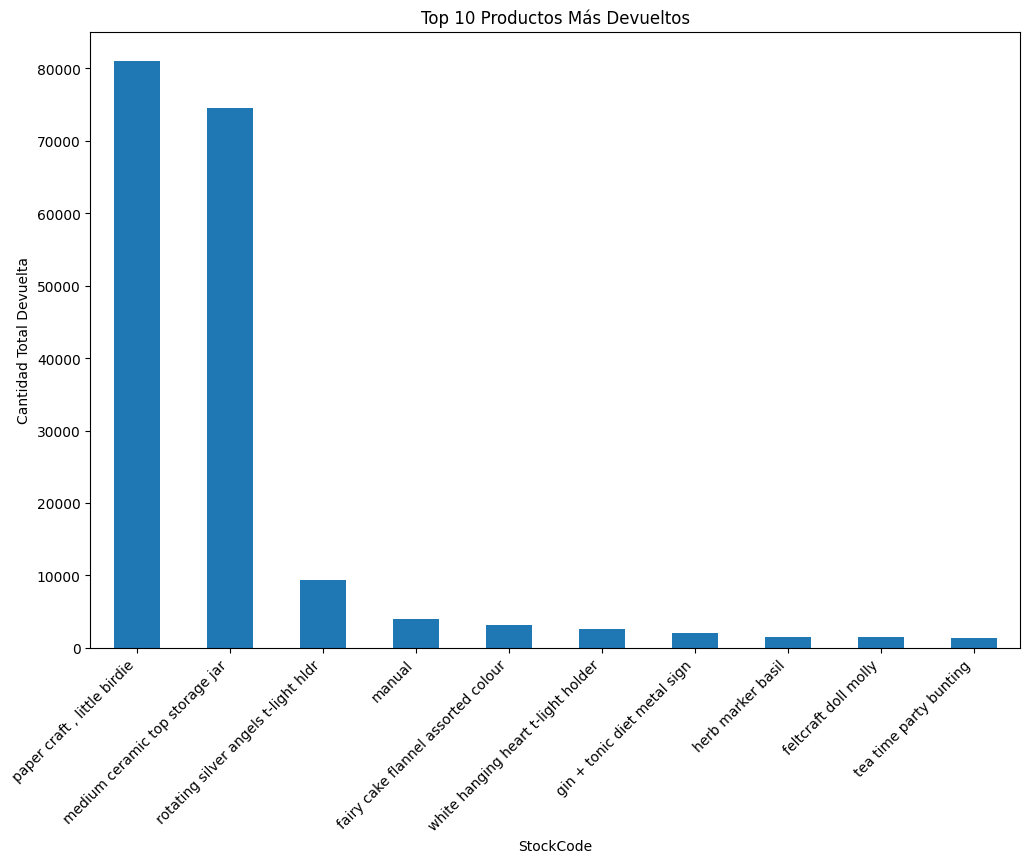

In [14]:
# Filtrar las devoluciones (cantidad negativa)
df_devoluciones = df[df['Quantity'] < 0]

# Agrupar por StockCode y sumar las devoluciones
productos_devueltos = df_devoluciones.groupby('Description')['Quantity'].sum().sort_values()

# Seleccionar los 10 productos con más devoluciones (en valor absoluto)
top_devoluciones = productos_devueltos.head(10).abs()

print(top_devoluciones)

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
top_devoluciones.plot(kind='bar')
plt.title('Top 10 Productos Más Devueltos')
plt.xlabel('StockCode')
plt.ylabel('Cantidad Total Devuelta')
plt.xticks(rotation=45,  ha='right')
plt.show()

C:\Users\luish\AppData\Local\Temp\ipykernel_2328\3688663381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_devoluciones['CostLoss'] = df_devoluciones['Quantity'] * df_devoluciones['UnitPrice']


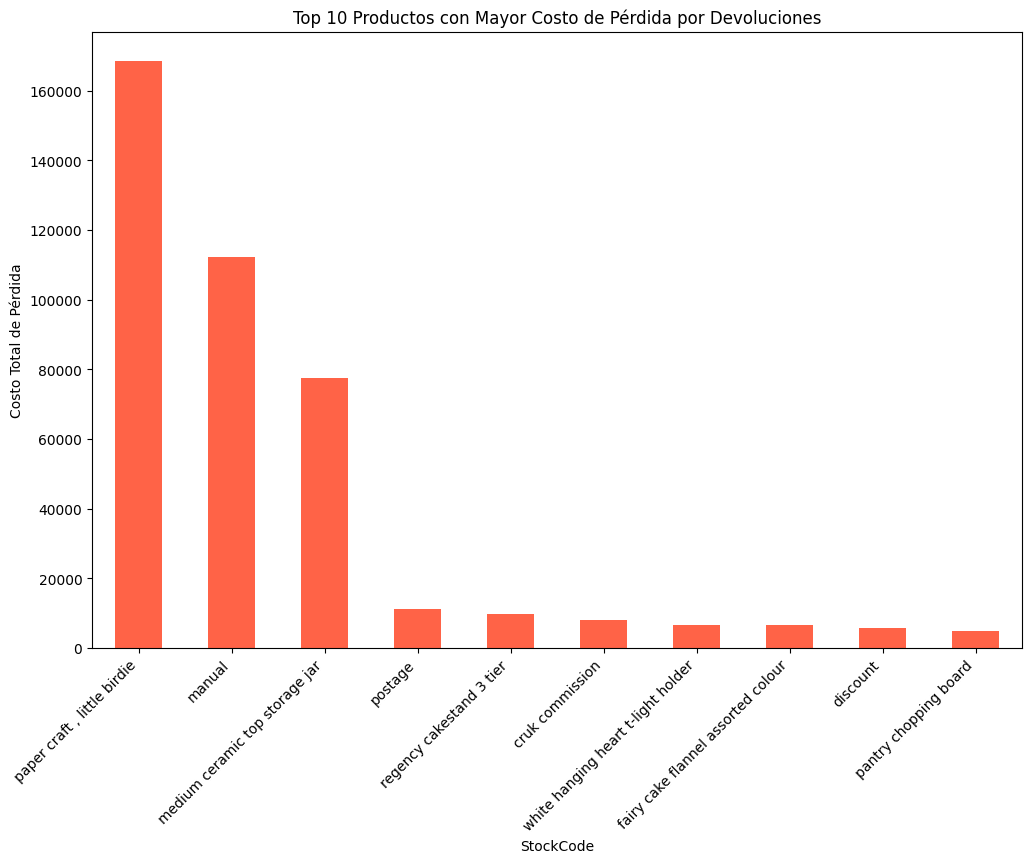

In [15]:
# Filtrar las devoluciones (cantidad negativa)
df_devoluciones = df[df['Quantity'] < 0]

# Calcular el costo de pérdida para cada devolución
df_devoluciones['CostLoss'] = df_devoluciones['Quantity'] * df_devoluciones['UnitPrice']

# Agrupar por StockCode y sumar el costo de pérdida
productos_perdida = df_devoluciones.groupby('Description')['CostLoss'].sum().sort_values()

# Seleccionar los 10 productos con mayor costo de pérdida
top_perdida = productos_perdida.head(10).abs()

# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
top_perdida.plot(kind='bar', color='tomato')
plt.title('Top 10 Productos con Mayor Costo de Pérdida por Devoluciones')
plt.xlabel('StockCode')
plt.ylabel('Costo Total de Pérdida')
plt.xticks(rotation=45, ha='right')
plt.show()

---
### Conclusiones

---

Después de realizar una exploración del documento resumimos brevemente las columnas:

* InvoiceNo: Número de la factura (posiblemente categórico).
* StockCode: Código del producto (posiblemente categórico).
* Description: Descripción del producto (texto).
* Quantity: Cantidad de productos (numérico).
* InvoiceDate: Fecha de la factura (temporal).
* UnitPrice: Precio unitario del producto (numérico).
* CustomerID: Identificación del cliente (posiblemente categórico).
* Country: País del cliente (posiblemente categórico).
* TotalSpent: Total de dinero gastado en una transacción.


**Posibles predicciones basadas en el análisis exploratorio de los datos:**

* Predicción de ventas futuras: Tu variable objetivo **Quantity**.

* Clasificación de clientes (churn, segmentación, etc.): Variable objetivo  **repetición de compras por CustomerID**.

* Predicción de precio: Variable objetivo **UnitPrice**.



**Caracteristicas Relevantes:**


**Categóricas:**

* InvoiceNo y StockCode pueden ser útiles para identificar patrones específicos en facturas o productos.
* CustomerID es util para la segmentación o predicción de comportamiento de clientes.
* Country puede ser relevante para capturar diferencias geográficas en comportamiento de compra.


**Numéricas:**

* Quantity y UnitPrice son directamente relevantes para predicción de ventas o precios.
* Puedes utilizar InvoiceDate para extraer características temporales como el día de la semana, la hora, el mes, etc., que pueden influir en el comportamiento de compra.